**Assignment 2**

**Importing Libraries**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

**Reading Data from the Drive**

In [ ]:
data = pd.read_csv('/content/drive/My Drive/Sem5/ml/a2/train.csv')
data.describe()

,Age,Income (USD),Loan Amount Request (USD),Current Loan Expenses (USD),Dependents,Credit Score,No. of Defaults,Property ID,Property Age,Property Type,Co-Applicant,Property Price,Loan Sanction Amount (USD)
count,30000.000000,2.542400e+04,30000.000000,29828.000000,27507.000000,28297.000000,30000.000000,30000.000000,2.515000e+04,30000.000000,30000.000000,3.000000e+04,29660.000000
mean,40.092300,2.630574e+03,88826.333855,400.936876,2.253027,739.885381,0.193933,501.934700,2.631119e+03,2.460067,-4.743867,1.317597e+05,47649.342208
std,16.045129,1.126272e+04,59536.949605,242.545375,0.951162,72.163846,0.395384,288.158086,1.132268e+04,1.118562,74.614593,9.354955e+04,48221.146686
min,18.000000,3.777000e+02,6048.240000,-999.000000,1.000000,580.000000,0.000000,1.000000,3.777000e+02,1.000000,-999.000000,-9.990000e+02,-999.000000
25%,25.000000,1.650457e+03,41177.755000,247.667500,2.000000,681.880000,0.000000,251.000000,1.650450e+03,1.000000,1.000000,6.057216e+04,0.000000
50%,40.000000,2.222435e+03,75128.075000,375.205000,2.000000,739.820000,0.000000,504.000000,2.223250e+03,2.000000,1.000000,1.099936e+05,35209.395000
75%,55.000000,3.090593e+03,119964.605000,521.292500,3.000000,799.120000,0.000000,751.000000,3.091408e+03,3.000000,1.000000,1.788807e+05,74261.250000
max,65.000000,1.777460e+06,621497.820000,3840.880000,14.000000,896.260000,1.000000,999.000000,1.777460e+06,4.000000,1.000000,1.077967e+06,481907.320000


**Removing unwanted Features**

In [ ]:
data.drop('Name',axis=1,inplace=True)
data.drop('Customer ID',axis=1,inplace=True)
data.drop('Gender',axis=1,inplace=True)
data.drop('Age',axis=1,inplace=True)
data.drop('Property ID',axis=1,inplace=True)
data.drop('Expense Type 1',axis=1,inplace=True)
data.drop('Expense Type 2',axis=1,inplace=True)
data.drop('Type of Employment',axis=1,inplace=True)
data.drop('Has Active Credit Card',axis=1,inplace=True)
data.drop('Co-Applicant',axis=1,inplace=True)
data

,Income (USD),Income Stability,Profession,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Dependents,Credit Score,No. of Defaults,Property Age,Property Type,Property Location,Property Price,Loan Sanction Amount (USD)
0,1933.05,Low,Working,Semi-Urban,72809.58,241.08,3.0,809.44,0,1933.05,4,Rural,119933.46,54607.18
1,4952.91,Low,Working,Semi-Urban,46837.47,495.81,1.0,780.40,0,4952.91,2,Rural,54791.00,37469.98
2,988.19,High,Pensioner,Semi-Urban,45593.04,171.95,1.0,833.15,0,988.19,2,Urban,72440.58,36474.43
3,NaN,High,Pensioner,Rural,80057.92,298.54,2.0,832.70,1,NaN,2,Semi-Urban,121441.51,56040.54
4,2614.77,Low,Working,Semi-Urban,113858.89,491.41,NaN,745.55,1,2614.77,4,Semi-Urban,208567.91,74008.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,4969.41,Low,Commercial associate,Urban,76657.90,722.34,2.0,869.61,0,4969.41,4,Urban,111096.56,68992.11
29996,1606.88,Low,Working,Semi-Urban,66595.14,253.04,3.0,729.41,0,1606.88,3,Urban,73453.94,46616.60
29997,NaN,Low,Working,Urban,81410.08,583.11,NaN,NaN,0,NaN,1,Rural,102108.02,61057.56
29998,2417.71,Low,Working,Semi-Urban,142524.10,378.29,3.0,677.27,1,2417.71,4,Urban,168194.47,99766.87


**Missing Values Imputation**

**1) Profession**

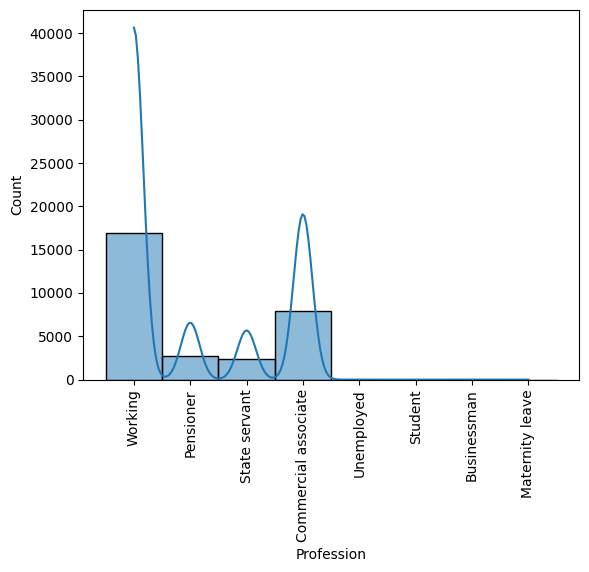

In [ ]:
sns.histplot(data['Profession'],kde='True')
plt.xticks(rotation=90)
plt.show()

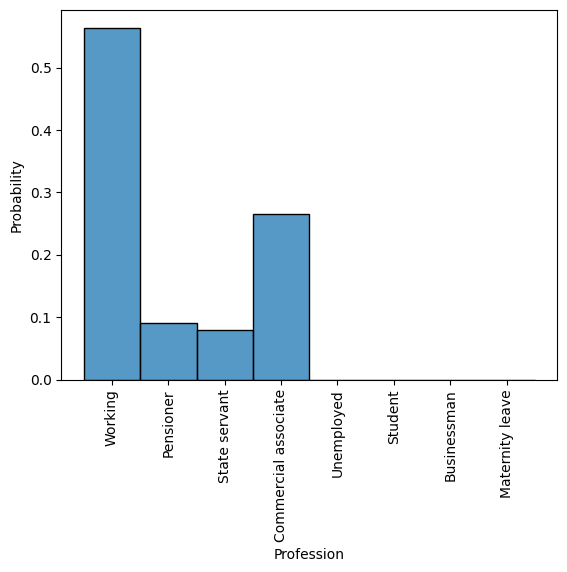

In [ ]:
sns.histplot(data['Profession'],stat='probability',discrete=True)
plt.xticks(rotation=90)
plt.show()

In [ ]:
df_numeric = data.select_dtypes(include='number')
corr_matrix = df_numeric.corr()
corr_matrix

,Income (USD),Loan Amount Request (USD),Current Loan Expenses (USD),Dependents,Credit Score,No. of Defaults,Property Age,Property Type,Property Price,Loan Sanction Amount (USD)
Income (USD),1.000000,0.050371,0.055080,0.005170,0.012911,-0.002141,1.000000,0.009733,0.050679,0.038157
Loan Amount Request (USD),0.050371,1.000000,0.682248,0.040952,0.178260,0.000088,0.049976,0.003802,0.948350,0.726408
Current Loan Expenses (USD),0.055080,0.682248,1.000000,0.045300,0.114950,0.002767,0.054682,0.014812,0.648636,0.485070
Dependents,0.005170,0.040952,0.045300,1.000000,-0.090271,0.009108,0.005082,-0.009303,0.037302,0.009088
Credit Score,0.012911,0.178260,0.114950,-0.090271,1.000000,0.006647,0.012959,0.009116,0.170829,0.369450
No. of Defaults,-0.002141,0.000088,0.002767,0.009108,0.006647,1.000000,-0.002093,0.000477,0.001718,-0.004330
Property Age,1.000000,0.049976,0.054682,0.005082,0.012959,-0.002093,1.000000,0.009798,0.050306,0.037796
Property Type,0.009733,0.003802,0.014812,-0.009303,0.009116,0.000477,0.009798,1.000000,0.003279,0.001984
Property Price,0.050679,0.948350,0.648636,0.037302,0.170829,0.001718,0.050306,0.003279,1.000000,0.687181
Loan Sanction Amount (USD),0.038157,0.726408,0.485070,0.009088,0.369450,-0.004330,0.037796,0.001984,0.687181,1.000000


<Axes: >

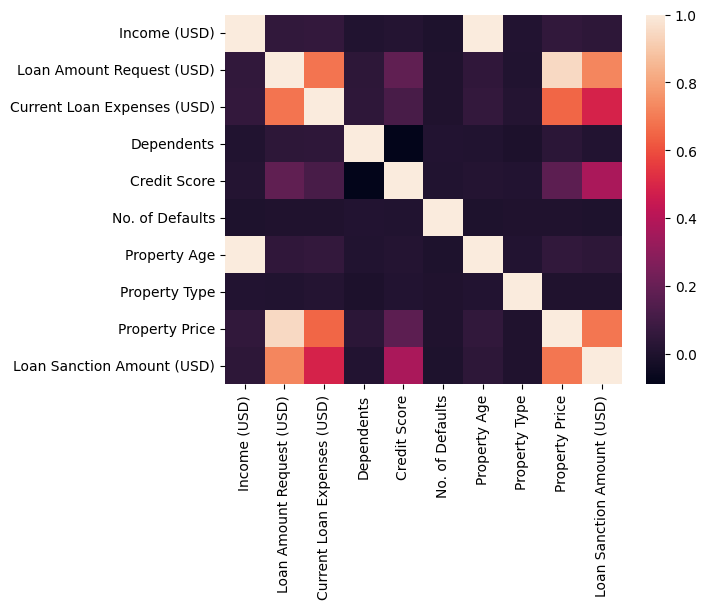

In [ ]:
sns.heatmap(corr_matrix)

**2) Property Age**

<Axes: xlabel='Property Age', ylabel='Count'>

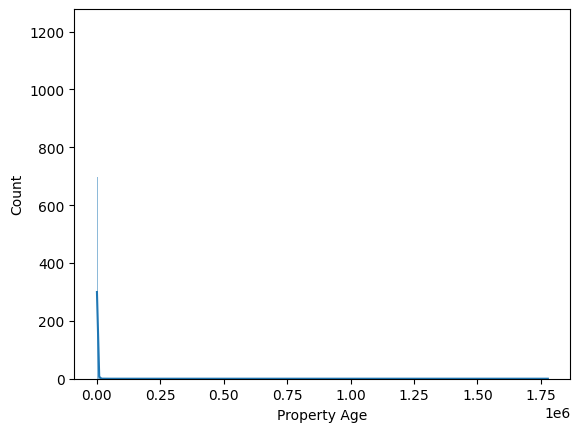

In [ ]:
sns.histplot(data['Property Age'],kde=True)

<Axes: xlabel='Property Age', ylabel='Count'>

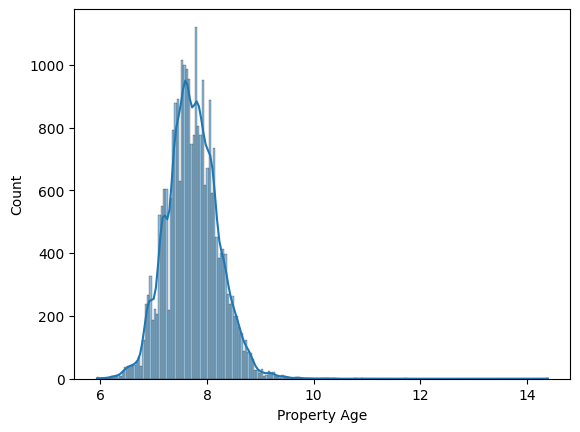

In [ ]:
sns.histplot(np.log1p(data['Property Age']),kde=True)

In [ ]:
prop_age_imputer = SimpleImputer(strategy='mean')
data['Property Age'] = prop_age_imputer.fit_transform(data[['Property Age']])

data

,Income (USD),Income Stability,Profession,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Dependents,Credit Score,No. of Defaults,Property Age,Property Type,Property Location,Property Price,Loan Sanction Amount (USD)
0,1933.05,Low,Working,Semi-Urban,72809.58,241.08,3.0,809.44,0,1933.05000,4,Rural,119933.46,54607.18
1,4952.91,Low,Working,Semi-Urban,46837.47,495.81,1.0,780.40,0,4952.91000,2,Rural,54791.00,37469.98
2,988.19,High,Pensioner,Semi-Urban,45593.04,171.95,1.0,833.15,0,988.19000,2,Urban,72440.58,36474.43
3,NaN,High,Pensioner,Rural,80057.92,298.54,2.0,832.70,1,2631.11944,2,Semi-Urban,121441.51,56040.54
4,2614.77,Low,Working,Semi-Urban,113858.89,491.41,NaN,745.55,1,2614.77000,4,Semi-Urban,208567.91,74008.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,4969.41,Low,Commercial associate,Urban,76657.90,722.34,2.0,869.61,0,4969.41000,4,Urban,111096.56,68992.11
29996,1606.88,Low,Working,Semi-Urban,66595.14,253.04,3.0,729.41,0,1606.88000,3,Urban,73453.94,46616.60
29997,NaN,Low,Working,Urban,81410.08,583.11,NaN,NaN,0,2631.11944,1,Rural,102108.02,61057.56
29998,2417.71,Low,Working,Semi-Urban,142524.10,378.29,3.0,677.27,1,2417.71000,4,Urban,168194.47,99766.87


In [ ]:
data['Property Age'].mode()

,Property Age
0,2631.11944


In [ ]:
data['Property Age'].value_counts()

,count
Property Age,
2631.11944,4850
2415.70000,4
1608.43000,4
2444.68000,3
2114.52000,3
...,...
2637.76000,1
3642.87000,1
3067.24000,1


<Axes: xlabel='Property Age', ylabel='Count'>

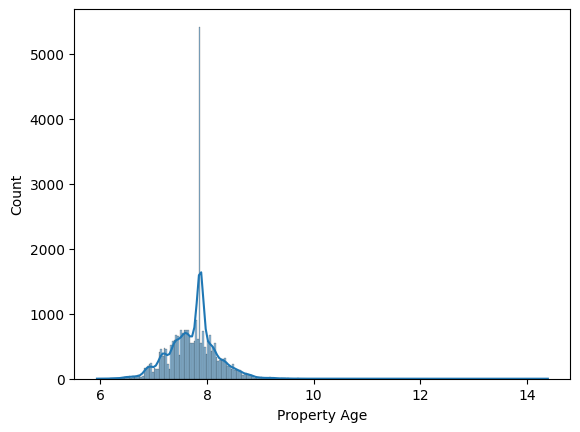

In [ ]:
sns.histplot(np.log1p(data['Property Age']),kde=True)

In [ ]:
missing_data = data.isnull().sum()
print(missing_data,end='\n\n')
missing_data_percentage = (missing_data / len(data)) * 100
print(missing_data_percentage)

Income (USD)                   4576
Income Stability               1683
Profession                        0
Location                          0
Loan Amount Request (USD)         0
Current Loan Expenses (USD)     172
Dependents                     2493
Credit Score                   1703
No. of Defaults                   0
Property Age                      0
Property Type                     0
Property Location               356
Property Price                    0
Loan Sanction Amount (USD)      340
dtype: int64

Income (USD)                   15.253333
Income Stability                5.610000
Profession                      0.000000
Location                        0.000000
Loan Amount Request (USD)       0.000000
Current Loan Expenses (USD)     0.573333
Dependents                      8.310000
Credit Score                    5.676667
No. of Defaults                 0.000000
Property Age                    0.000000
Property Type                   0.000000
Property Location              

**3) Income(USD)**

<Axes: xlabel='Income (USD)', ylabel='Count'>

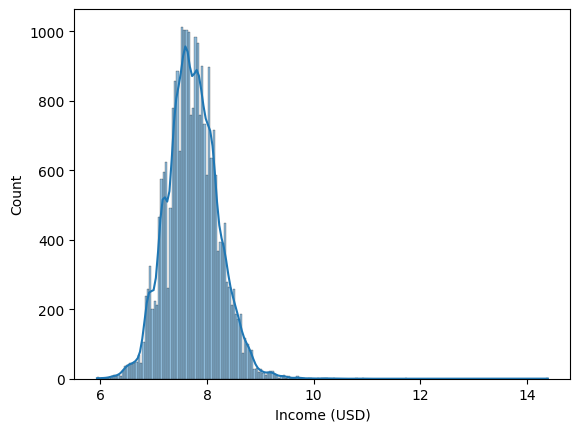

In [ ]:
sns.histplot(np.log1p(data['Income (USD)']),kde=True)

In [ ]:
income_imputer = SimpleImputer(strategy='mean')
data['Income (USD)'] = income_imputer.fit_transform(data[['Income (USD)']])

data

,Income (USD),Income Stability,Profession,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Dependents,Credit Score,No. of Defaults,Property Age,Property Type,Property Location,Property Price,Loan Sanction Amount (USD)
0,1933.050000,Low,Working,Semi-Urban,72809.58,241.08,3.0,809.44,0,1933.05000,4,Rural,119933.46,54607.18
1,4952.910000,Low,Working,Semi-Urban,46837.47,495.81,1.0,780.40,0,4952.91000,2,Rural,54791.00,37469.98
2,988.190000,High,Pensioner,Semi-Urban,45593.04,171.95,1.0,833.15,0,988.19000,2,Urban,72440.58,36474.43
3,2630.574417,High,Pensioner,Rural,80057.92,298.54,2.0,832.70,1,2631.11944,2,Semi-Urban,121441.51,56040.54
4,2614.770000,Low,Working,Semi-Urban,113858.89,491.41,NaN,745.55,1,2614.77000,4,Semi-Urban,208567.91,74008.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,4969.410000,Low,Commercial associate,Urban,76657.90,722.34,2.0,869.61,0,4969.41000,4,Urban,111096.56,68992.11
29996,1606.880000,Low,Working,Semi-Urban,66595.14,253.04,3.0,729.41,0,1606.88000,3,Urban,73453.94,46616.60
29997,2630.574417,Low,Working,Urban,81410.08,583.11,NaN,NaN,0,2631.11944,1,Rural,102108.02,61057.56
29998,2417.710000,Low,Working,Semi-Urban,142524.10,378.29,3.0,677.27,1,2417.71000,4,Urban,168194.47,99766.87


<Axes: xlabel='Income (USD)', ylabel='Count'>

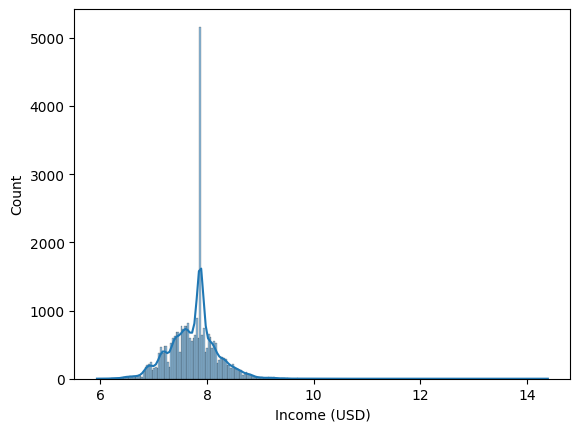

In [ ]:
sns.histplot(np.log1p(data['Income (USD)']),kde=True)

**4) Income Stability**

In [ ]:
income_stab_imputer = SimpleImputer(strategy='most_frequent')
data[['Income Stability']] = income_stab_imputer.fit_transform(data[['Income Stability']])

data

,Income (USD),Income Stability,Profession,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Dependents,Credit Score,No. of Defaults,Property Age,Property Type,Property Location,Property Price,Loan Sanction Amount (USD)
0,1933.050000,Low,Working,Semi-Urban,72809.58,241.08,3.0,809.44,0,1933.05000,4,Rural,119933.46,54607.18
1,4952.910000,Low,Working,Semi-Urban,46837.47,495.81,1.0,780.40,0,4952.91000,2,Rural,54791.00,37469.98
2,988.190000,High,Pensioner,Semi-Urban,45593.04,171.95,1.0,833.15,0,988.19000,2,Urban,72440.58,36474.43
3,2630.574417,High,Pensioner,Rural,80057.92,298.54,2.0,832.70,1,2631.11944,2,Semi-Urban,121441.51,56040.54
4,2614.770000,Low,Working,Semi-Urban,113858.89,491.41,NaN,745.55,1,2614.77000,4,Semi-Urban,208567.91,74008.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,4969.410000,Low,Commercial associate,Urban,76657.90,722.34,2.0,869.61,0,4969.41000,4,Urban,111096.56,68992.11
29996,1606.880000,Low,Working,Semi-Urban,66595.14,253.04,3.0,729.41,0,1606.88000,3,Urban,73453.94,46616.60
29997,2630.574417,Low,Working,Urban,81410.08,583.11,NaN,NaN,0,2631.11944,1,Rural,102108.02,61057.56
29998,2417.710000,Low,Working,Semi-Urban,142524.10,378.29,3.0,677.27,1,2417.71000,4,Urban,168194.47,99766.87


**5) Current Loan Expenses**

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='Current Loan Expenses (USD)', ylabel='Count'>

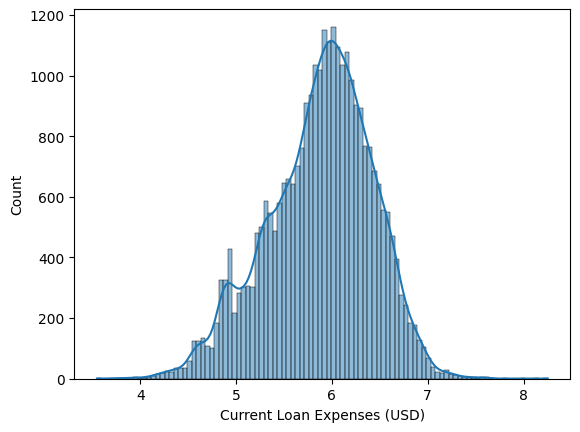

In [ ]:
sns.histplot(np.log1p(data['Current Loan Expenses (USD)']),kde=True)

In [ ]:
cur_loan_exp_imputer = SimpleImputer(strategy='mean')
data['Current Loan Expenses (USD)'] = cur_loan_exp_imputer.fit_transform(data[['Current Loan Expenses (USD)']])

data

,Income (USD),Income Stability,Profession,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Dependents,Credit Score,No. of Defaults,Property Age,Property Type,Property Location,Property Price,Loan Sanction Amount (USD)
0,1933.050000,Low,Working,Semi-Urban,72809.58,241.08,3.0,809.44,0,1933.05000,4,Rural,119933.46,54607.18
1,4952.910000,Low,Working,Semi-Urban,46837.47,495.81,1.0,780.40,0,4952.91000,2,Rural,54791.00,37469.98
2,988.190000,High,Pensioner,Semi-Urban,45593.04,171.95,1.0,833.15,0,988.19000,2,Urban,72440.58,36474.43
3,2630.574417,High,Pensioner,Rural,80057.92,298.54,2.0,832.70,1,2631.11944,2,Semi-Urban,121441.51,56040.54
4,2614.770000,Low,Working,Semi-Urban,113858.89,491.41,NaN,745.55,1,2614.77000,4,Semi-Urban,208567.91,74008.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,4969.410000,Low,Commercial associate,Urban,76657.90,722.34,2.0,869.61,0,4969.41000,4,Urban,111096.56,68992.11
29996,1606.880000,Low,Working,Semi-Urban,66595.14,253.04,3.0,729.41,0,1606.88000,3,Urban,73453.94,46616.60
29997,2630.574417,Low,Working,Urban,81410.08,583.11,NaN,NaN,0,2631.11944,1,Rural,102108.02,61057.56
29998,2417.710000,Low,Working,Semi-Urban,142524.10,378.29,3.0,677.27,1,2417.71000,4,Urban,168194.47,99766.87


/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='Current Loan Expenses (USD)', ylabel='Count'>

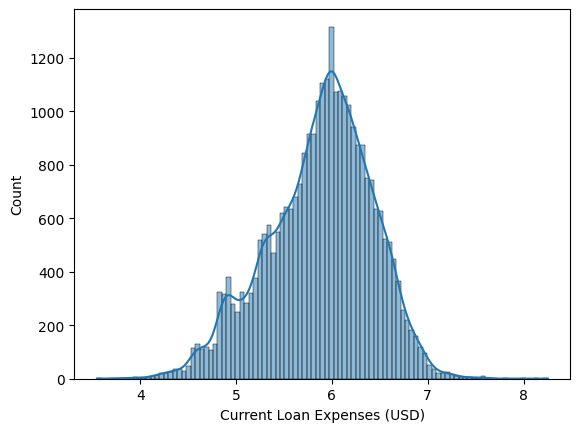

In [ ]:
sns.histplot(np.log1p(data['Current Loan Expenses (USD)']),kde=True)

**6) Credit Score**

<Axes: xlabel='Credit Score', ylabel='Count'>

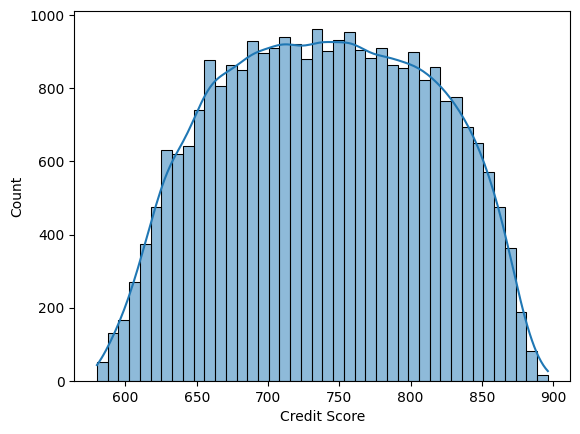

In [ ]:
sns.histplot((data['Credit Score']),kde=True)

In [ ]:
credit_score_imputer = SimpleImputer(strategy='mean')
data['Credit Score'] = credit_score_imputer.fit_transform(data[['Credit Score']])

data

,Income (USD),Income Stability,Profession,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Dependents,Credit Score,No. of Defaults,Property Age,Property Type,Property Location,Property Price,Loan Sanction Amount (USD)
0,1933.050000,Low,Working,Semi-Urban,72809.58,241.08,3.0,809.440000,0,1933.05000,4,Rural,119933.46,54607.18
1,4952.910000,Low,Working,Semi-Urban,46837.47,495.81,1.0,780.400000,0,4952.91000,2,Rural,54791.00,37469.98
2,988.190000,High,Pensioner,Semi-Urban,45593.04,171.95,1.0,833.150000,0,988.19000,2,Urban,72440.58,36474.43
3,2630.574417,High,Pensioner,Rural,80057.92,298.54,2.0,832.700000,1,2631.11944,2,Semi-Urban,121441.51,56040.54
4,2614.770000,Low,Working,Semi-Urban,113858.89,491.41,NaN,745.550000,1,2614.77000,4,Semi-Urban,208567.91,74008.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,4969.410000,Low,Commercial associate,Urban,76657.90,722.34,2.0,869.610000,0,4969.41000,4,Urban,111096.56,68992.11
29996,1606.880000,Low,Working,Semi-Urban,66595.14,253.04,3.0,729.410000,0,1606.88000,3,Urban,73453.94,46616.60
29997,2630.574417,Low,Working,Urban,81410.08,583.11,NaN,739.885381,0,2631.11944,1,Rural,102108.02,61057.56
29998,2417.710000,Low,Working,Semi-Urban,142524.10,378.29,3.0,677.270000,1,2417.71000,4,Urban,168194.47,99766.87


<Axes: xlabel='Credit Score', ylabel='Count'>

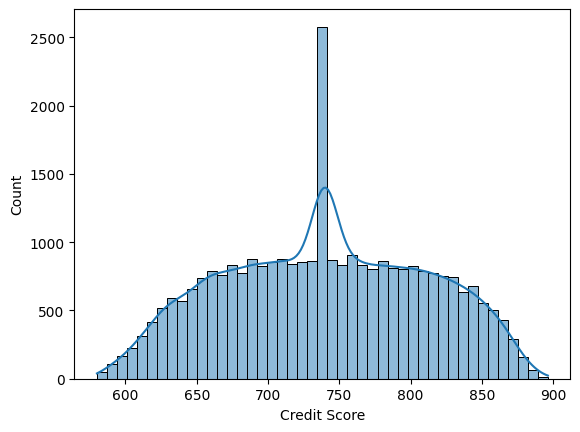

In [ ]:
sns.histplot((data['Credit Score']),kde=True)

**7) Dependents**

<Axes: xlabel='Dependents', ylabel='Count'>

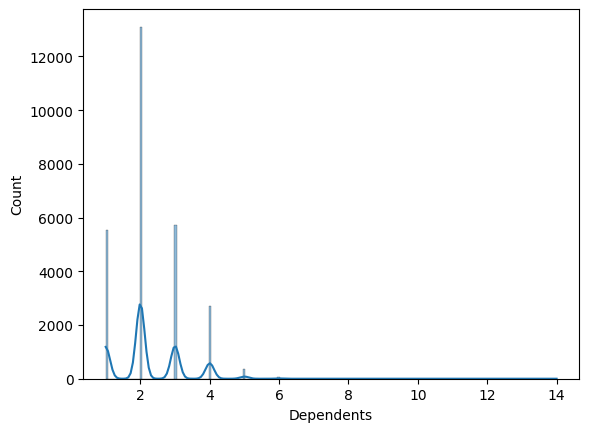

In [ ]:
sns.histplot((data['Dependents']),kde=True)

In [ ]:
dependents_imputer = SimpleImputer(strategy='median')
data['Dependents'] = dependents_imputer.fit_transform(data[['Dependents']])

data

,Income (USD),Income Stability,Profession,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Dependents,Credit Score,No. of Defaults,Property Age,Property Type,Property Location,Property Price,Loan Sanction Amount (USD)
0,1933.050000,Low,Working,Semi-Urban,72809.58,241.08,3.0,809.440000,0,1933.05000,4,Rural,119933.46,54607.18
1,4952.910000,Low,Working,Semi-Urban,46837.47,495.81,1.0,780.400000,0,4952.91000,2,Rural,54791.00,37469.98
2,988.190000,High,Pensioner,Semi-Urban,45593.04,171.95,1.0,833.150000,0,988.19000,2,Urban,72440.58,36474.43
3,2630.574417,High,Pensioner,Rural,80057.92,298.54,2.0,832.700000,1,2631.11944,2,Semi-Urban,121441.51,56040.54
4,2614.770000,Low,Working,Semi-Urban,113858.89,491.41,2.0,745.550000,1,2614.77000,4,Semi-Urban,208567.91,74008.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,4969.410000,Low,Commercial associate,Urban,76657.90,722.34,2.0,869.610000,0,4969.41000,4,Urban,111096.56,68992.11
29996,1606.880000,Low,Working,Semi-Urban,66595.14,253.04,3.0,729.410000,0,1606.88000,3,Urban,73453.94,46616.60
29997,2630.574417,Low,Working,Urban,81410.08,583.11,2.0,739.885381,0,2631.11944,1,Rural,102108.02,61057.56
29998,2417.710000,Low,Working,Semi-Urban,142524.10,378.29,3.0,677.270000,1,2417.71000,4,Urban,168194.47,99766.87


<Axes: xlabel='Dependents', ylabel='Count'>

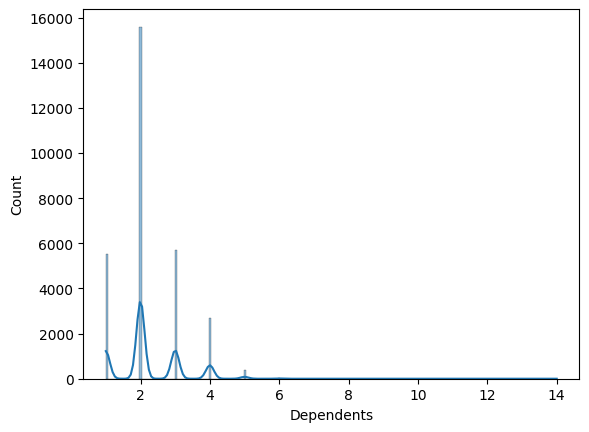

In [ ]:
sns.histplot((data['Dependents']),kde=True)

**8) Property Location**

In [ ]:
prop_loc_imputer = SimpleImputer(strategy='most_frequent')
data[['Property Location']] = prop_loc_imputer.fit_transform(data[['Property Location']])

data

,Income (USD),Income Stability,Profession,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Dependents,Credit Score,No. of Defaults,Property Age,Property Type,Property Location,Property Price,Loan Sanction Amount (USD)
0,1933.050000,Low,Working,Semi-Urban,72809.58,241.08,3.0,809.440000,0,1933.05000,4,Rural,119933.46,54607.18
1,4952.910000,Low,Working,Semi-Urban,46837.47,495.81,1.0,780.400000,0,4952.91000,2,Rural,54791.00,37469.98
2,988.190000,High,Pensioner,Semi-Urban,45593.04,171.95,1.0,833.150000,0,988.19000,2,Urban,72440.58,36474.43
3,2630.574417,High,Pensioner,Rural,80057.92,298.54,2.0,832.700000,1,2631.11944,2,Semi-Urban,121441.51,56040.54
4,2614.770000,Low,Working,Semi-Urban,113858.89,491.41,2.0,745.550000,1,2614.77000,4,Semi-Urban,208567.91,74008.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,4969.410000,Low,Commercial associate,Urban,76657.90,722.34,2.0,869.610000,0,4969.41000,4,Urban,111096.56,68992.11
29996,1606.880000,Low,Working,Semi-Urban,66595.14,253.04,3.0,729.410000,0,1606.88000,3,Urban,73453.94,46616.60
29997,2630.574417,Low,Working,Urban,81410.08,583.11,2.0,739.885381,0,2631.11944,1,Rural,102108.02,61057.56
29998,2417.710000,Low,Working,Semi-Urban,142524.10,378.29,3.0,677.270000,1,2417.71000,4,Urban,168194.47,99766.87


**9) Loan Sanction Amount (USD)**

In [ ]:
data.dropna(subset=['Loan Sanction Amount (USD)'],inplace=True)

data

,Income (USD),Income Stability,Profession,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Dependents,Credit Score,No. of Defaults,Property Age,Property Type,Property Location,Property Price,Loan Sanction Amount (USD)
0,1933.050000,Low,Working,Semi-Urban,72809.58,241.08,3.0,809.440000,0,1933.05000,4,Rural,119933.46,54607.18
1,4952.910000,Low,Working,Semi-Urban,46837.47,495.81,1.0,780.400000,0,4952.91000,2,Rural,54791.00,37469.98
2,988.190000,High,Pensioner,Semi-Urban,45593.04,171.95,1.0,833.150000,0,988.19000,2,Urban,72440.58,36474.43
3,2630.574417,High,Pensioner,Rural,80057.92,298.54,2.0,832.700000,1,2631.11944,2,Semi-Urban,121441.51,56040.54
4,2614.770000,Low,Working,Semi-Urban,113858.89,491.41,2.0,745.550000,1,2614.77000,4,Semi-Urban,208567.91,74008.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,4969.410000,Low,Commercial associate,Urban,76657.90,722.34,2.0,869.610000,0,4969.41000,4,Urban,111096.56,68992.11
29996,1606.880000,Low,Working,Semi-Urban,66595.14,253.04,3.0,729.410000,0,1606.88000,3,Urban,73453.94,46616.60
29997,2630.574417,Low,Working,Urban,81410.08,583.11,2.0,739.885381,0,2631.11944,1,Rural,102108.02,61057.56
29998,2417.710000,Low,Working,Semi-Urban,142524.10,378.29,3.0,677.270000,1,2417.71000,4,Urban,168194.47,99766.87


In [ ]:
print(data.isnull().sum())

Income (USD)                   0
Income Stability               0
Profession                     0
Location                       0
Loan Amount Request (USD)      0
Current Loan Expenses (USD)    0
Dependents                     0
Credit Score                   0
No. of Defaults                0
Property Age                   0
Property Type                  0
Property Location              0
Property Price                 0
Loan Sanction Amount (USD)     0
dtype: int64


In [ ]:
data.head()

,Income (USD),Income Stability,Profession,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Dependents,Credit Score,No. of Defaults,Property Age,Property Type,Property Location,Property Price,Loan Sanction Amount (USD)
0,1933.050000,Low,Working,Semi-Urban,72809.58,241.08,3.0,809.44,0,1933.05000,4,Rural,119933.46,54607.18
1,4952.910000,Low,Working,Semi-Urban,46837.47,495.81,1.0,780.40,0,4952.91000,2,Rural,54791.00,37469.98
2,988.190000,High,Pensioner,Semi-Urban,45593.04,171.95,1.0,833.15,0,988.19000,2,Urban,72440.58,36474.43
3,2630.574417,High,Pensioner,Rural,80057.92,298.54,2.0,832.70,1,2631.11944,2,Semi-Urban,121441.51,56040.54
4,2614.770000,Low,Working,Semi-Urban,113858.89,491.41,2.0,745.55,1,2614.77000,4,Semi-Urban,208567.91,74008.28


In [ ]:
data['Property Location'].unique()

array(['Rural', 'Urban', 'Semi-Urban'], dtype=object)

In [ ]:
data = pd.get_dummies(data,columns=['Income Stability'],drop_first=True)
data

,Income (USD),Profession,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Dependents,Credit Score,No. of Defaults,Property Age,Property Type,Property Location,Property Price,Loan Sanction Amount (USD),Income Stability_Low
0,1933.050000,Working,Semi-Urban,72809.58,241.08,3.0,809.440000,0,1933.05000,4,Rural,119933.46,54607.18,True
1,4952.910000,Working,Semi-Urban,46837.47,495.81,1.0,780.400000,0,4952.91000,2,Rural,54791.00,37469.98,True
2,988.190000,Pensioner,Semi-Urban,45593.04,171.95,1.0,833.150000,0,988.19000,2,Urban,72440.58,36474.43,False
3,2630.574417,Pensioner,Rural,80057.92,298.54,2.0,832.700000,1,2631.11944,2,Semi-Urban,121441.51,56040.54,False
4,2614.770000,Working,Semi-Urban,113858.89,491.41,2.0,745.550000,1,2614.77000,4,Semi-Urban,208567.91,74008.28,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,4969.410000,Commercial associate,Urban,76657.90,722.34,2.0,869.610000,0,4969.41000,4,Urban,111096.56,68992.11,True
29996,1606.880000,Working,Semi-Urban,66595.14,253.04,3.0,729.410000,0,1606.88000,3,Urban,73453.94,46616.60,True
29997,2630.574417,Working,Urban,81410.08,583.11,2.0,739.885381,0,2631.11944,1,Rural,102108.02,61057.56,True
29998,2417.710000,Working,Semi-Urban,142524.10,378.29,3.0,677.270000,1,2417.71000,4,Urban,168194.47,99766.87,True


In [ ]:
data = pd.get_dummies(data,columns=['Location','Property Location'],drop_first=True)
data

,Income (USD),Profession,Loan Amount Request (USD),Current Loan Expenses (USD),Dependents,Credit Score,No. of Defaults,Property Age,Property Type,Property Price,Loan Sanction Amount (USD),Income Stability_Low,Location_Semi-Urban,Location_Urban,Property Location_Semi-Urban,Property Location_Urban
0,1933.050000,Working,72809.58,241.08,3.0,809.440000,0,1933.05000,4,119933.46,54607.18,True,True,False,False,False
1,4952.910000,Working,46837.47,495.81,1.0,780.400000,0,4952.91000,2,54791.00,37469.98,True,True,False,False,False
2,988.190000,Pensioner,45593.04,171.95,1.0,833.150000,0,988.19000,2,72440.58,36474.43,False,True,False,False,True
3,2630.574417,Pensioner,80057.92,298.54,2.0,832.700000,1,2631.11944,2,121441.51,56040.54,False,False,False,True,False
4,2614.770000,Working,113858.89,491.41,2.0,745.550000,1,2614.77000,4,208567.91,74008.28,True,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,4969.410000,Commercial associate,76657.90,722.34,2.0,869.610000,0,4969.41000,4,111096.56,68992.11,True,False,True,False,True
29996,1606.880000,Working,66595.14,253.04,3.0,729.410000,0,1606.88000,3,73453.94,46616.60,True,True,False,False,True
29997,2630.574417,Working,81410.08,583.11,2.0,739.885381,0,2631.11944,1,102108.02,61057.56,True,False,True,False,False
29998,2417.710000,Working,142524.10,378.29,3.0,677.270000,1,2417.71000,4,168194.47,99766.87,True,True,False,False,True


In [ ]:
# Convert all boolean columns to int
for col in data.columns:
    if data[col].dtype == 'bool':
        data[col] = data[col].astype(int)

In [ ]:
# Step 1: Calculate mean of target for each profession
target_mean = data.groupby('Profession')['Loan Sanction Amount (USD)'].mean()

# Step 2: Map the mean back to the 'Profession' column
data['Profession_encoded'] = data['Profession'].map(target_mean)

In [ ]:
data.drop(columns=['Profession'],inplace=True)

In [ ]:
data

,Income (USD),Loan Amount Request (USD),Current Loan Expenses (USD),Dependents,Credit Score,No. of Defaults,Property Age,Property Type,Property Price,Loan Sanction Amount (USD),Income Stability_Low,Location_Semi-Urban,Location_Urban,Property Location_Semi-Urban,Property Location_Urban,Profession_encoded
0,1933.050000,72809.58,241.08,3.0,809.440000,0,1933.05000,4,119933.46,54607.18,1,1,0,0,0,43372.179038
1,4952.910000,46837.47,495.81,1.0,780.400000,0,4952.91000,2,54791.00,37469.98,1,1,0,0,0,43372.179038
2,988.190000,45593.04,171.95,1.0,833.150000,0,988.19000,2,72440.58,36474.43,0,1,0,0,1,54825.847763
3,2630.574417,80057.92,298.54,2.0,832.700000,1,2631.11944,2,121441.51,56040.54,0,0,0,1,0,54825.847763
4,2614.770000,113858.89,491.41,2.0,745.550000,1,2614.77000,4,208567.91,74008.28,1,1,0,1,0,43372.179038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,4969.410000,76657.90,722.34,2.0,869.610000,0,4969.41000,4,111096.56,68992.11,1,0,1,0,1,52507.008598
29996,1606.880000,66595.14,253.04,3.0,729.410000,0,1606.88000,3,73453.94,46616.60,1,1,0,0,1,43372.179038
29997,2630.574417,81410.08,583.11,2.0,739.885381,0,2631.11944,1,102108.02,61057.56,1,0,1,0,0,43372.179038
29998,2417.710000,142524.10,378.29,3.0,677.270000,1,2417.71000,4,168194.47,99766.87,1,1,0,0,1,43372.179038


In [ ]:
data.corr()

,Income (USD),Loan Amount Request (USD),Current Loan Expenses (USD),Dependents,Credit Score,No. of Defaults,Property Age,Property Type,Property Price,Loan Sanction Amount (USD),Income Stability_Low,Location_Semi-Urban,Location_Urban,Property Location_Semi-Urban,Property Location_Urban,Profession_encoded
Income (USD),1.000000,0.045949,0.050435,0.004925,0.011682,-0.001942,0.999892,0.008888,0.046295,0.034997,0.012035,-0.009961,0.029934,0.006878,-0.003622,0.006236
Loan Amount Request (USD),0.045949,1.000000,0.681192,0.039133,0.172441,-0.000114,0.045377,0.004043,0.948553,0.726408,0.014300,-0.072281,0.143348,-0.001709,0.006135,0.078043
Current Loan Expenses (USD),0.050435,0.681192,1.000000,0.042979,0.110906,0.001943,0.049766,0.015184,0.647941,0.483733,0.040609,-0.081689,0.165244,-0.004077,0.001042,0.058724
Dependents,0.004925,0.039133,0.042979,1.000000,-0.083326,0.007991,0.004809,-0.008972,0.035927,0.004788,0.156072,-0.010925,-0.017827,-0.007922,0.002196,-0.090838
Credit Score,0.011682,0.172441,0.110906,-0.083326,1.000000,0.006858,0.011666,0.008029,0.165141,0.359709,-0.273490,-0.003774,0.115252,0.002320,0.001748,0.213280
No. of Defaults,-0.001942,-0.000114,0.001943,0.007991,0.006858,1.000000,-0.001879,0.000089,0.001622,-0.004330,-0.003743,-0.011738,-0.001520,0.004716,0.001731,-0.003288
Property Age,0.999892,0.045377,0.049766,0.004809,0.011666,-0.001879,1.000000,0.008912,0.045746,0.034493,0.011927,-0.009741,0.029402,0.006929,-0.003615,0.006128
Property Type,0.008888,0.004043,0.015184,-0.008972,0.008029,0.000089,0.008912,1.000000,0.003138,0.001984,-0.008365,0.002071,-0.004459,-0.018556,-0.016289,-0.000346
Property Price,0.046295,0.948553,0.647941,0.035927,0.165141,0.001622,0.045746,0.003138,1.000000,0.687181,0.012172,-0.066252,0.135739,-0.001237,0.004247,0.077914
Loan Sanction Amount (USD),0.034997,0.726408,0.483733,0.004788,0.359709,-0.004330,0.034493,0.001984,0.687181,1.000000,-0.040761,-0.050017,0.124344,-0.000539,0.006566,0.102136


In [ ]:
data

,Income (USD),Loan Amount Request (USD),Current Loan Expenses (USD),Dependents,Credit Score,No. of Defaults,Property Age,Property Type,Property Price,Loan Sanction Amount (USD),Income Stability_Low,Location_Semi-Urban,Location_Urban,Property Location_Semi-Urban,Property Location_Urban,Profession_encoded
0,1933.050000,72809.58,241.08,3.0,809.440000,0,1933.05000,4,119933.46,54607.18,1,1,0,0,0,43372.179038
1,4952.910000,46837.47,495.81,1.0,780.400000,0,4952.91000,2,54791.00,37469.98,1,1,0,0,0,43372.179038
2,988.190000,45593.04,171.95,1.0,833.150000,0,988.19000,2,72440.58,36474.43,0,1,0,0,1,54825.847763
3,2630.574417,80057.92,298.54,2.0,832.700000,1,2631.11944,2,121441.51,56040.54,0,0,0,1,0,54825.847763
4,2614.770000,113858.89,491.41,2.0,745.550000,1,2614.77000,4,208567.91,74008.28,1,1,0,1,0,43372.179038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,4969.410000,76657.90,722.34,2.0,869.610000,0,4969.41000,4,111096.56,68992.11,1,0,1,0,1,52507.008598
29996,1606.880000,66595.14,253.04,3.0,729.410000,0,1606.88000,3,73453.94,46616.60,1,1,0,0,1,43372.179038
29997,2630.574417,81410.08,583.11,2.0,739.885381,0,2631.11944,1,102108.02,61057.56,1,0,1,0,0,43372.179038
29998,2417.710000,142524.10,378.29,3.0,677.270000,1,2417.71000,4,168194.47,99766.87,1,1,0,0,1,43372.179038


In [ ]:
data.columns

Index(['Income (USD)', 'Loan Amount Request (USD)',
       'Current Loan Expenses (USD)', 'Dependents', 'Credit Score',
       'No. of Defaults', 'Property Age', 'Property Type', 'Property Price',
       'Loan Sanction Amount (USD)', 'Income Stability_Low',
       'Location_Semi-Urban', 'Location_Urban', 'Property Location_Semi-Urban',
       'Property Location_Urban', 'Profession_encoded'],
      dtype='object')

In [ ]:
target = data[['Loan Sanction Amount (USD)']]
data.drop(columns=['Loan Sanction Amount (USD)'],inplace=True)

In [ ]:
x = data
y = target

In [ ]:
for col in x.columns:
  print(col,x[col].unique())

Income (USD) [1933.05 4952.91  988.19 ... 1606.88 2417.71 3068.24]
Loan Amount Request (USD) [ 72809.58  46837.47  45593.04 ...  81410.08 142524.1  156290.54]
Current Loan Expenses (USD) [241.08 495.81 171.95 ... 583.11 378.29 693.94]
Dependents [ 3.  1.  2.  4.  5.  8.  6.  7. 10. 14.]
Credit Score [809.44 780.4  833.15 ... 709.43 869.61 815.44]
No. of Defaults [0 1]
Property Age [1933.05 4952.91  988.19 ... 1606.88 2417.71 3068.24]
Property Type [4 2 1 3]
Property Price [119933.46  54791.    72440.58 ... 102108.02 168194.47 194512.6 ]
Income Stability_Low [1 0]
Location_Semi-Urban [1 0]
Location_Urban [0 1]
Property Location_Semi-Urban [0 1]
Property Location_Urban [0 1]
Profession_encoded [43372.17903758 54825.84776306 53616.559006   52507.0085985
 25056.79           0.         62941.285      76277.29      ]


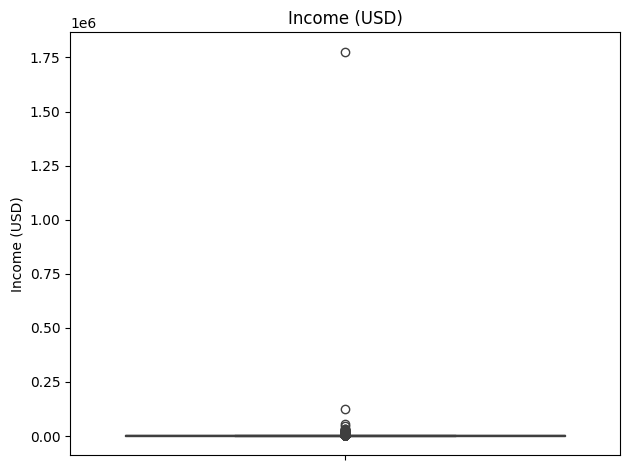

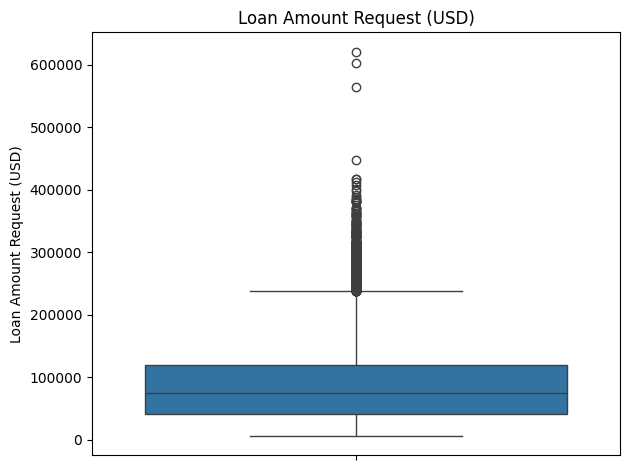

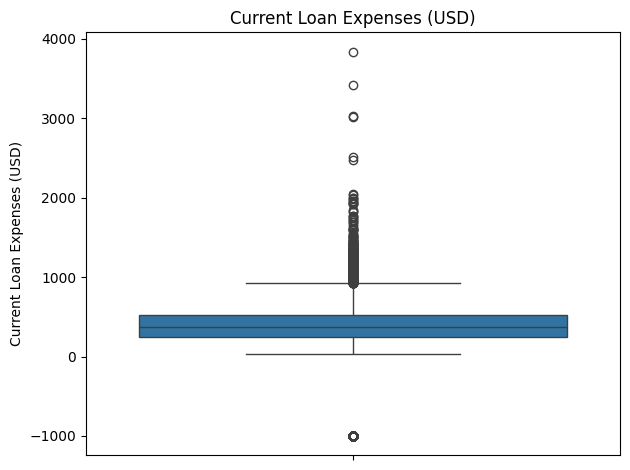

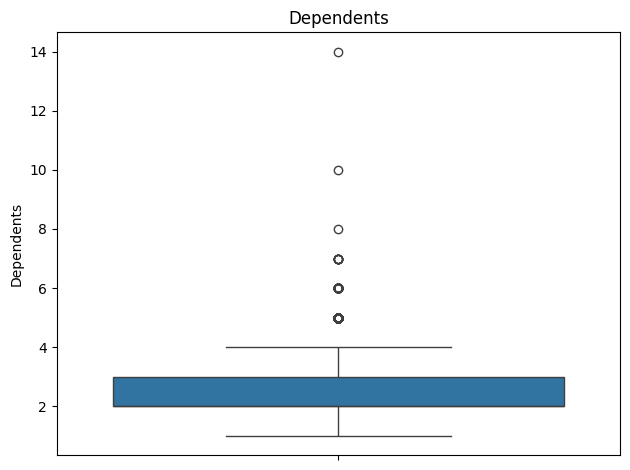

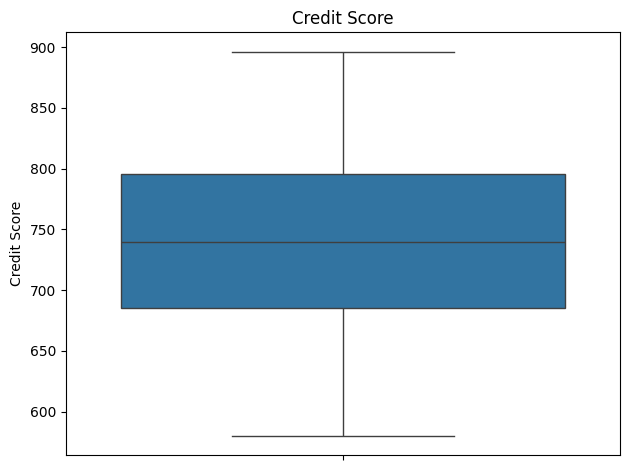

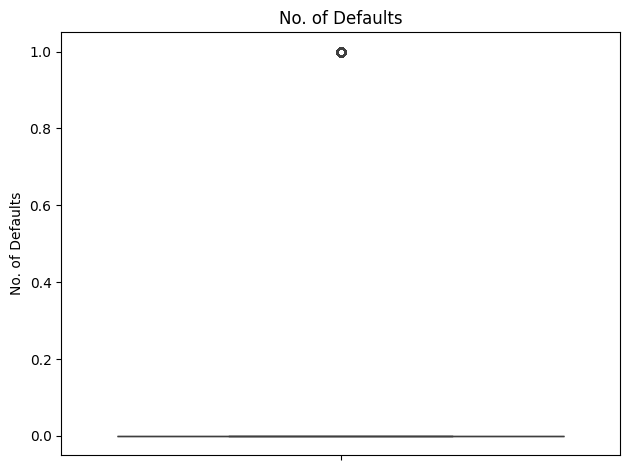

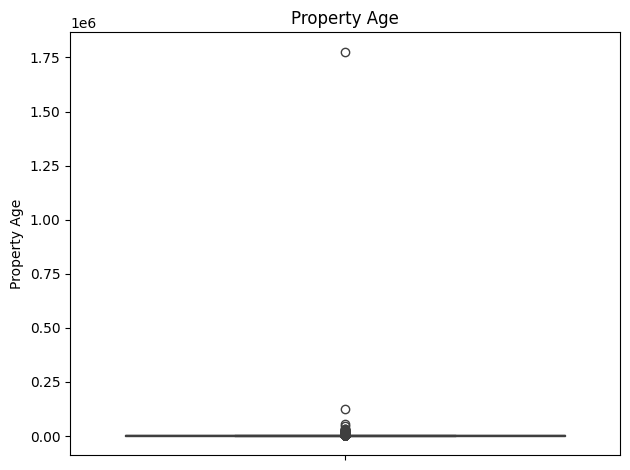

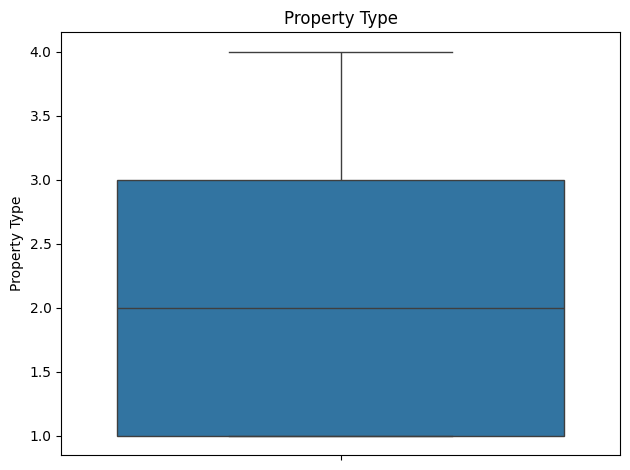

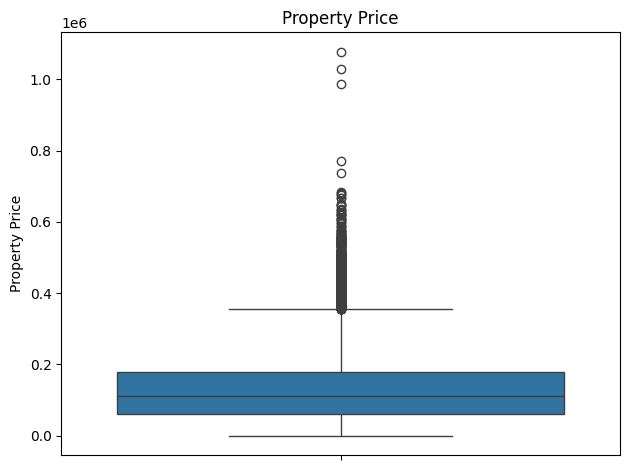

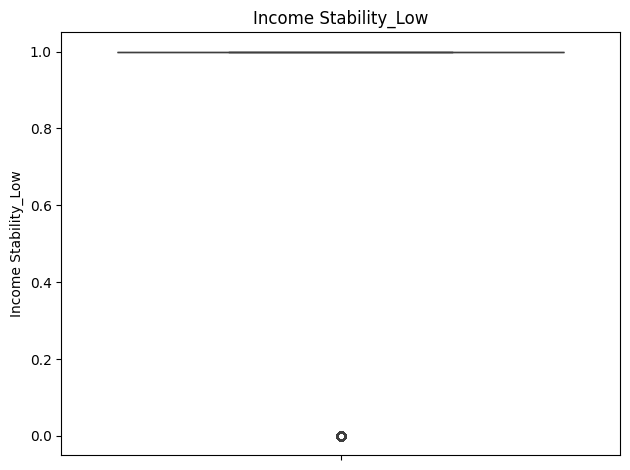

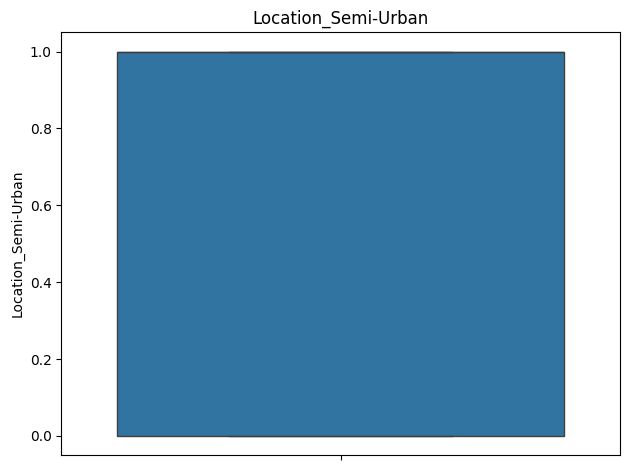

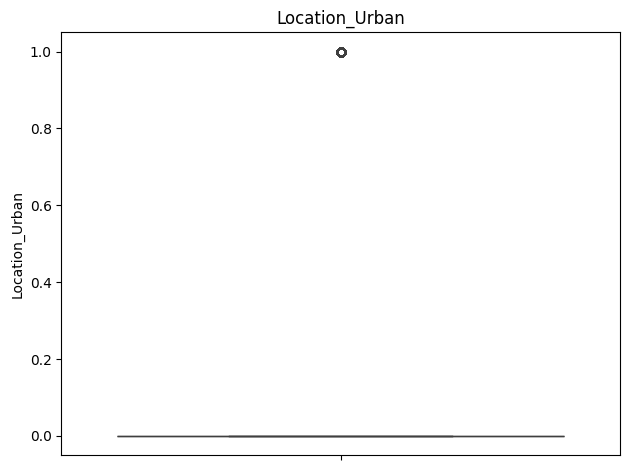

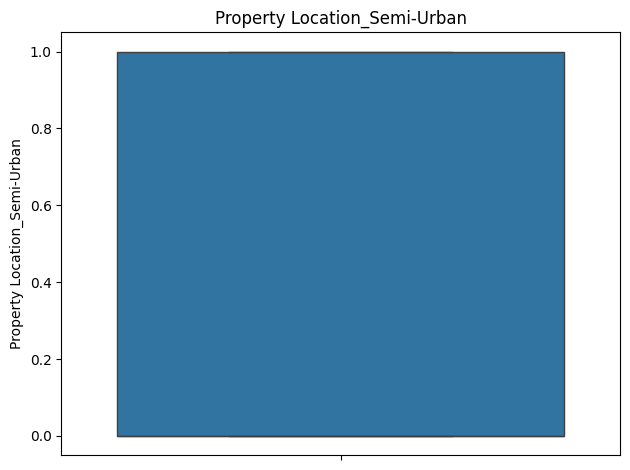

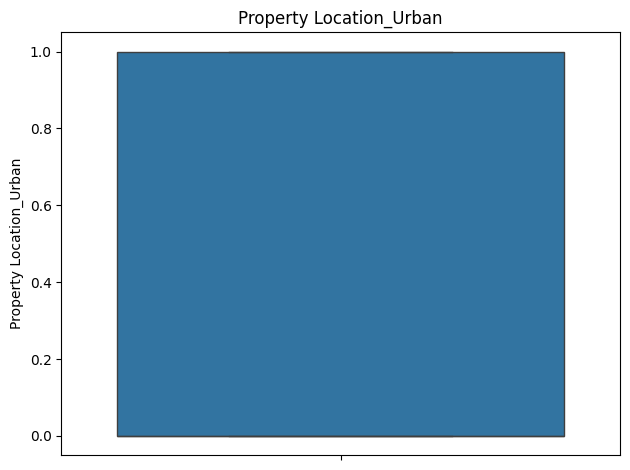

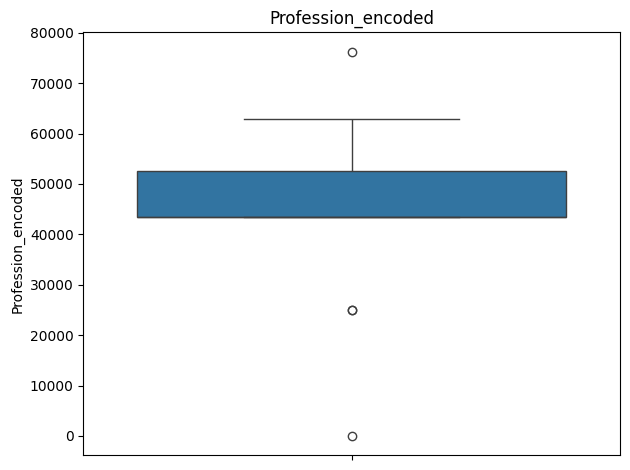

In [ ]:
for col in x.columns:
  sns.boxplot(x[col])
  plt.title(col)
  plt.tight_layout()
  plt.show()

In [ ]:
outlier_column = ['Income (USD)', 'Loan Amount Request (USD)',
       'Current Loan Expenses (USD)', 'Dependents', 'Credit Score',
       'Property Age', 'Property Type',
       'Property Price','Profession_encoded']


for col in outlier_column:
  Q1 = x[col].quantile(0.25)
  Q3 = x[col].quantile(0.75)
  IQR = Q3 - Q1
  low = Q1 - 1.5 * IQR
  high = Q3 + 1.5 * IQR

  x[col] = x[col].clip(low, high)


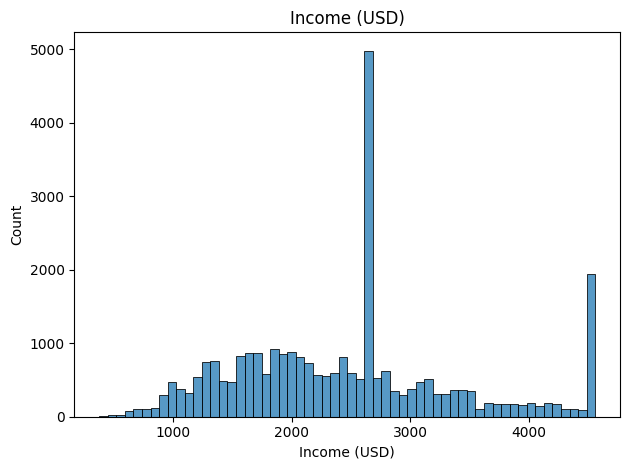

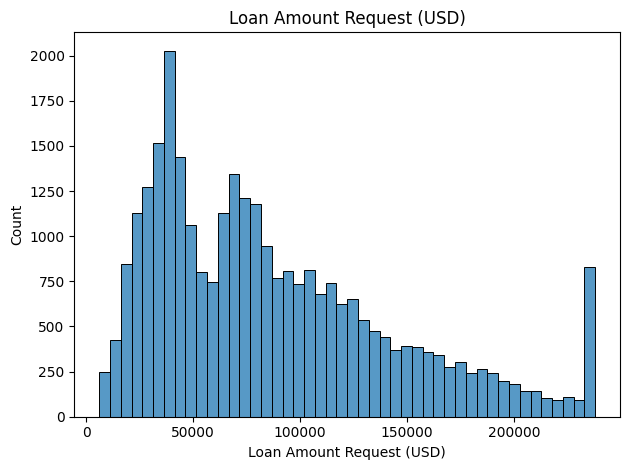

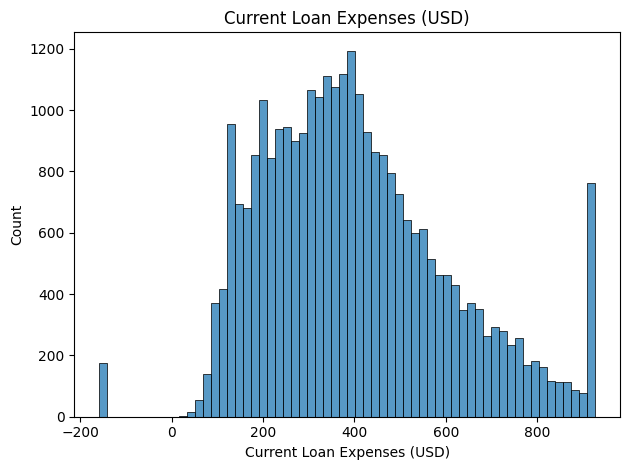

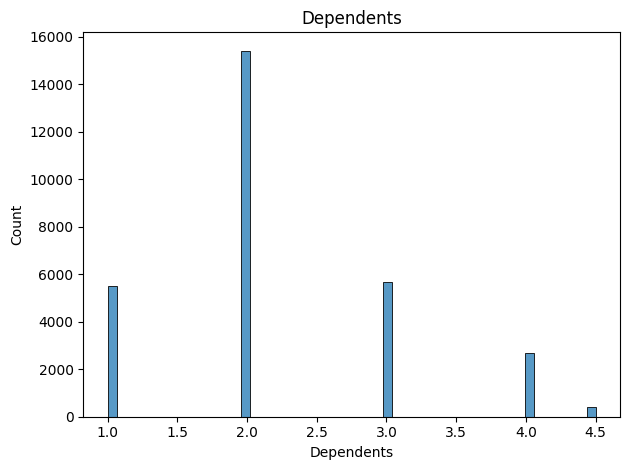

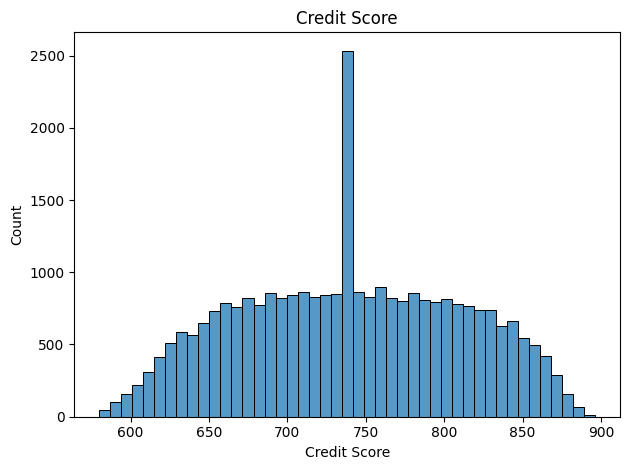

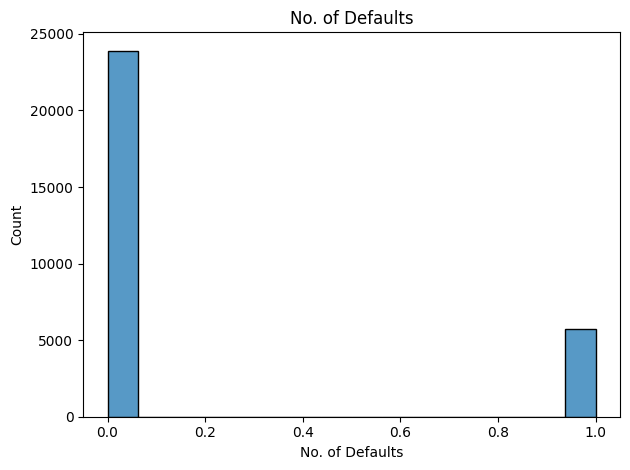

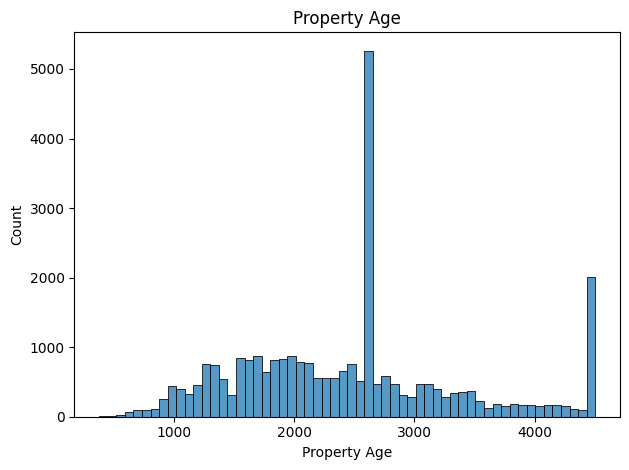

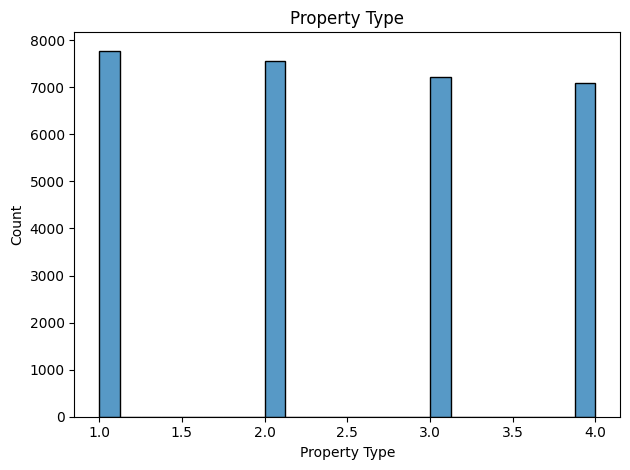

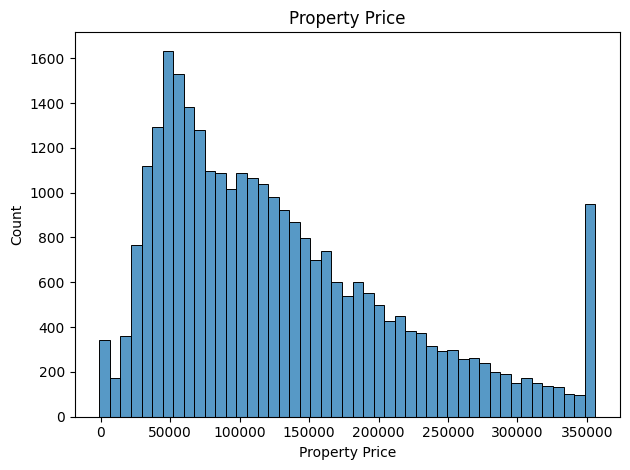

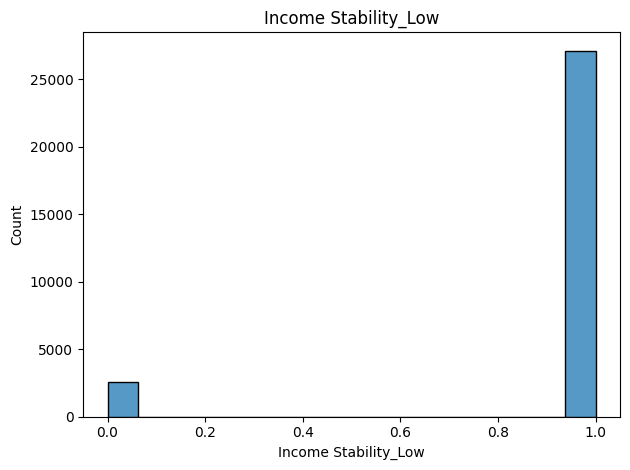

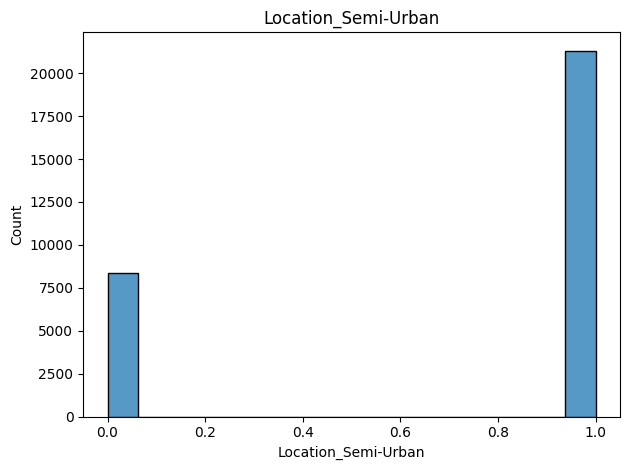

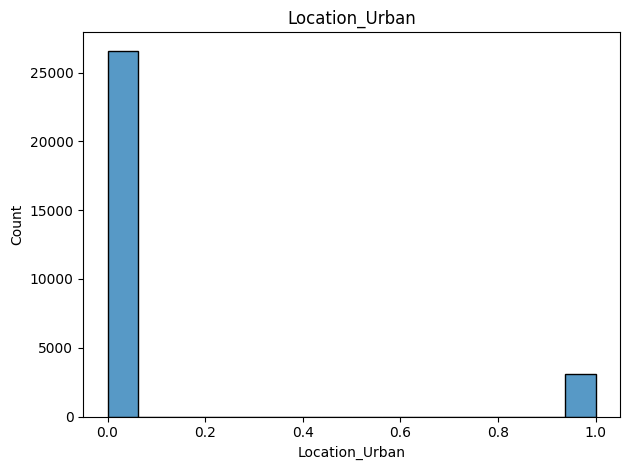

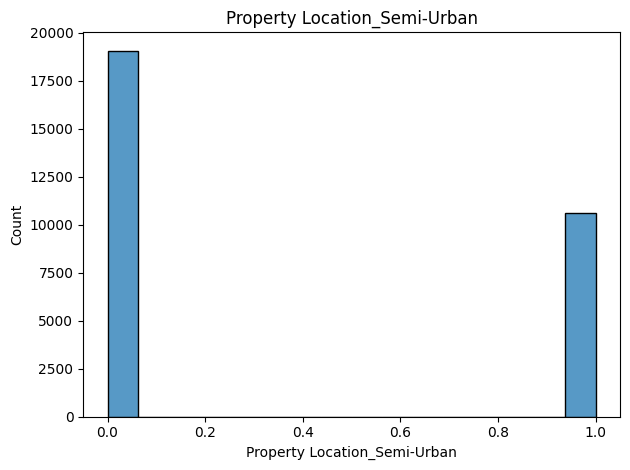

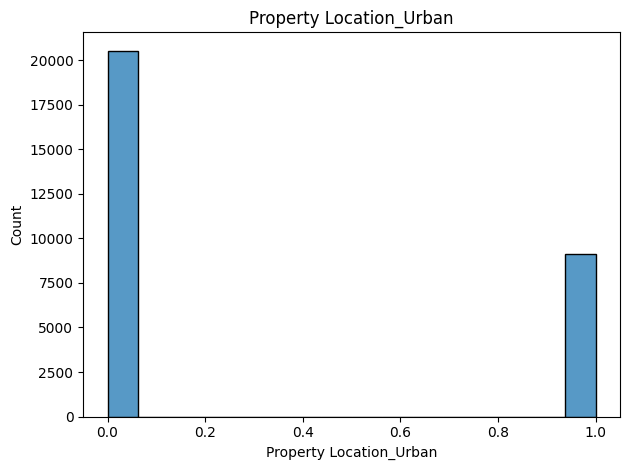

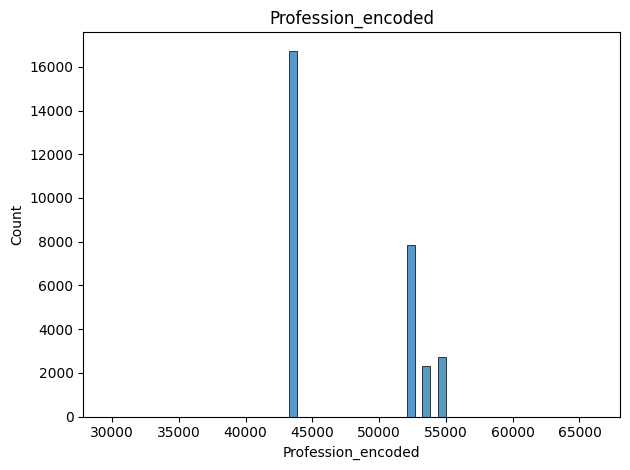

In [ ]:
for col in data.columns:
  sns.histplot(data[col])
  plt.title(col)
  plt.tight_layout()
  plt.show()

In [ ]:
x.head()

,Income (USD),Loan Amount Request (USD),Current Loan Expenses (USD),Dependents,Credit Score,No. of Defaults,Property Age,Property Type,Property Price,Income Stability_Low,Location_Semi-Urban,Location_Urban,Property Location_Semi-Urban,Property Location_Urban,Profession_encoded
0,1933.050000,72809.58,241.08,3.0,809.44,0,1933.05000,4,119933.46,1,1,0,0,0,43372.179038
1,4561.072500,46837.47,495.81,1.0,780.40,0,4503.23375,2,54791.00,1,1,0,0,0,43372.179038
2,988.190000,45593.04,171.95,1.0,833.15,0,988.19000,2,72440.58,0,1,0,0,1,54825.847763
3,2630.574417,80057.92,298.54,2.0,832.70,1,2631.11944,2,121441.51,0,0,0,1,0,54825.847763
4,2614.770000,113858.89,491.41,2.0,745.55,1,2614.77000,4,208567.91,1,1,0,1,0,43372.179038


In [ ]:
for col in x.columns:
  print(col,x[col].unique())

Income (USD) [1933.05   4561.0725  988.19   ... 1606.88   2417.71   3068.24  ]
Loan Amount Request (USD) [ 72809.58  46837.47  45593.04 ...  81410.08 142524.1  156290.54]
Current Loan Expenses (USD) [241.08 495.81 171.95 ... 583.11 378.29 693.94]
Dependents [3.  1.  2.  4.  4.5]
Credit Score [809.44 780.4  833.15 ... 709.43 869.61 815.44]
No. of Defaults [0 1]
Property Age [1933.05    4503.23375  988.19    ... 1606.88    2417.71    3068.24   ]
Property Type [4 2 1 3]
Property Price [119933.46  54791.    72440.58 ... 102108.02 168194.47 194512.6 ]
Income Stability_Low [1 0]
Location_Semi-Urban [1 0]
Location_Urban [0 1]
Property Location_Semi-Urban [0 1]
Property Location_Urban [0 1]
Profession_encoded [43372.17903758 54825.84776306 53616.559006   52507.0085985
 29669.93469619 62941.285      66209.25293988]


**Standarization or Normalization**

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

numeric_cols = ['Income (USD)', 'Loan Amount Request (USD)',
       'Current Loan Expenses (USD)', 'Dependents', 'Credit Score',
       'Property Age', 'Property Type',
       'Property Price','Profession_encoded']

x[numeric_cols] = scaler.fit_transform(x[numeric_cols])

In [ ]:
x

,Income (USD),Loan Amount Request (USD),Current Loan Expenses (USD),Dependents,Credit Score,No. of Defaults,Property Age,Property Type,Property Price,Income Stability_Low,Location_Semi-Urban,Location_Urban,Property Location_Semi-Urban,Property Location_Urban,Profession_encoded
0,-0.556419,-0.266582,-0.787101,0.881368,0.992788,0,-0.562482,1.376616,-0.112344,1,1,0,0,0,-0.870340
1,2.202677,-0.729023,0.463085,-1.385880,0.578465,0,2.173317,-0.411213,-0.866411,1,1,0,0,0,-0.870340
2,-1.548404,-0.751180,-1.126384,-1.385880,1.331067,0,-1.568226,-0.411213,-0.662106,0,1,0,0,1,1.459785
3,0.175895,-0.137523,-0.505094,-0.252256,1.324646,1,0.180569,-0.411213,-0.094887,0,0,0,1,0,1.459785
4,0.159302,0.464313,0.441490,-0.252256,0.081249,1,0.163166,1.376616,0.913660,1,1,0,1,0,-0.870340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,2.202677,-0.198061,1.574869,-0.252256,1.851254,0,2.173317,1.376616,-0.214637,1,0,1,0,1,0.988042
29996,-0.898857,-0.377232,-0.728403,0.881368,-0.149026,0,-0.909670,0.482702,-0.650375,1,1,0,0,1,-0.870340
29997,0.175895,-0.113447,0.891544,-0.252256,0.000430,0,0.180569,-1.305127,-0.318685,1,0,1,0,0,-0.870340
29998,-0.047586,0.974706,-0.113690,0.881368,-0.892925,1,-0.046592,1.376616,0.446310,1,1,0,0,1,-0.870340


In [ ]:
y

,Loan Sanction Amount (USD)
0,54607.18
1,37469.98
2,36474.43
3,56040.54
4,74008.28
...,...
29995,68992.11
29996,46616.60
29997,61057.56
29998,99766.87


**Model**

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(23728, 15) (5932, 15)
(23728, 1) (5932, 1)


In [ ]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(x_train,y_train)

y_pre_train = lr_model.predict(x_train)

**Training Performance Metrics**

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [ ]:
print("Training Accuracy :",lr_model.score(x_train,y_train)*100)

sse = np.sum((y_train.values - y_pre_train)**2)
print("\nSum of Squared Error for Training data :",sse)

mae = mean_absolute_error(y_train,y_pre_train)
print("\nMean Absolute Error :",mae)

mse = mean_squared_error(y_train,y_pre_train)
print("\nMean Squared Error :",mse)

r2 = r2_score(y_train,y_pre_train)
print("\nR-squared (R²) For Training :",r2)

Training Accuracy : 57.78427432723745

Sum of Squared Error for Training data : 23430183810746.34

Mean Absolute Error : 21482.210147617636

Mean Squared Error : 987448744.5526947

R-squared (R²) For Training : 0.5778427432723745


In [ ]:
n = x.shape[0]
p = x.shape[1]

adjusted_r2 = 1-((1-r2)*(n-1)/(n-p-1))

In [ ]:
print("Adjusted (R²) For Training :",adjusted_r2)

Adjusted (R²) For Training : 0.577629129763708


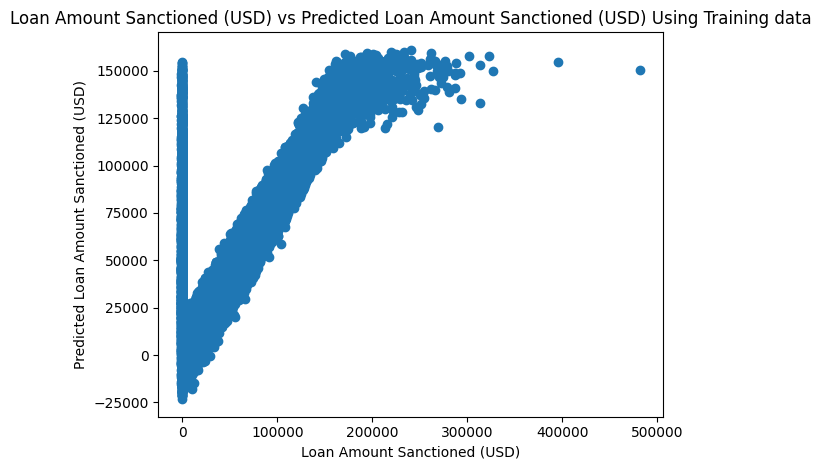

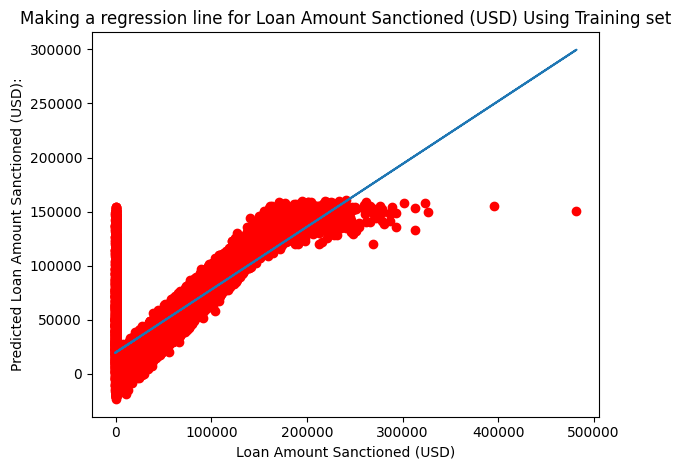

In [ ]:
def slope_intercept(x_val,y_val):
  x=np.array(x_val)
  y=np.array(y_val)
  m=(((np.mean(x)*np.mean(y)) - np.mean(x*y)) / ((np.mean(x)*np.mean(x)) -np.mean(x*x)))
  m=round(m,2)
  b=(np.mean(y) - np.mean(x)*m)
  b=round(b,2)
  #print("Slope :",m,"\tIntercept :",b)
  return m,b


plt.scatter(y_train,y_pre_train)
plt.xlabel("Loan Amount Sanctioned (USD)")
plt.ylabel("Predicted Loan Amount Sanctioned (USD)")
plt.title("Loan Amount Sanctioned (USD) vs Predicted Loan Amount Sanctioned (USD) Using Training data")
plt.tight_layout()
plt.show()
print()

m,b=slope_intercept(y_train, y_pre_train)
reg_line=[(m*x)+b for x in y_train.values]
plt.scatter(y_train,y_pre_train,color="red")
plt.plot(y_train,reg_line)
plt.xlabel("Loan Amount Sanctioned (USD)")
plt.ylabel("Predicted Loan Amount Sanctioned (USD):")
plt.title("Making a regression line for Loan Amount Sanctioned (USD) Using Training set")
plt.tight_layout()
plt.show()
print()

In [ ]:
coefficients = pd.Series(lr_model.coef_.flatten(), index=x.columns)
print(coefficients.sort_values(ascending=False))

Loan Amount Request (USD)       35227.583004
Credit Score                    11918.921506
Income Stability_Low             4498.534563
Income (USD)                     2623.804252
Location_Urban                    654.481867
Profession_encoded                582.539481
Property Location_Semi-Urban      565.371791
Property Location_Urban           419.161880
Location_Semi-Urban               147.635127
Dependents                        -96.780330
Property Type                    -205.506399
No. of Defaults                  -610.523779
Current Loan Expenses (USD)      -973.545471
Property Price                  -1811.393206
Property Age                    -2837.355621
dtype: float64


In [ ]:
print("Train R2:", r2_score(y_train, y_pre_train))

Train R2: 0.5778427432723745


In [ ]:
y_pre_test = lr_model.predict(x_test)

**Testing Performance Metrics**

In [ ]:
print("Testing Accuracy :",lr_model.score(x_test,y_test)*100)

sse = np.sum((y_test.values - y_pre_test)**2)
print("\nSum of Squared Error for Training data :",sse)

mae = mean_absolute_error(y_test,y_pre_test)
print("\nMean Absolute Error :",mae)

mse = mean_squared_error(y_test,y_pre_test)
print("\nMean Squared Error :",mse)

rmse = np.sqrt(mse)
print("\nRoot Mean Squared Error :",rmse)

r2 = r2_score(y_test,y_pre_test)
print("\nR-squared (R²) For Testing :",r2)

Testing Accuracy : 55.34733999299718

Sum of Squared Error for Training data : 6012169290111.256

Mean Absolute Error : 21557.20961376696

Mean Squared Error : 1013514715.123273

Root Mean Squared Error : 31835.745870377734

R-squared (R²) For Testing : 0.5534733999299718


In [ ]:
n = x.shape[0]
p = x.shape[1]

adjusted_r2 = 1-((1-r2)*(n-1)/(n-p-1))

In [ ]:
print("Adjusted (R²) For Testing :",adjusted_r2)

Adjusted (R²) For Testing : 0.5532474554217728


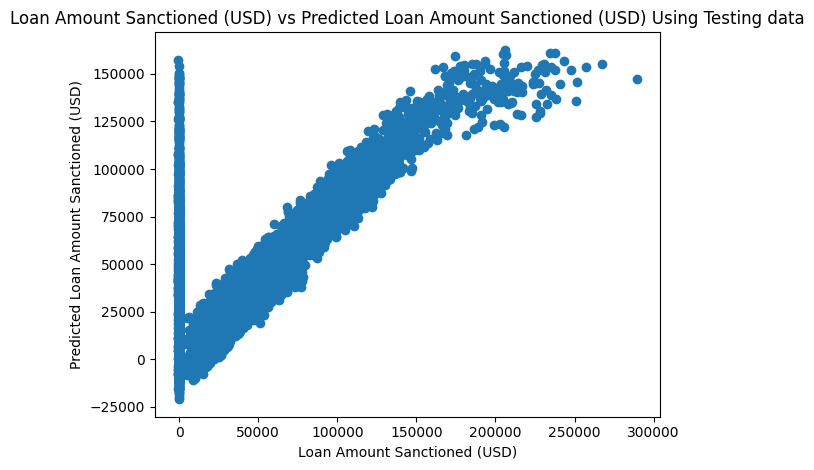

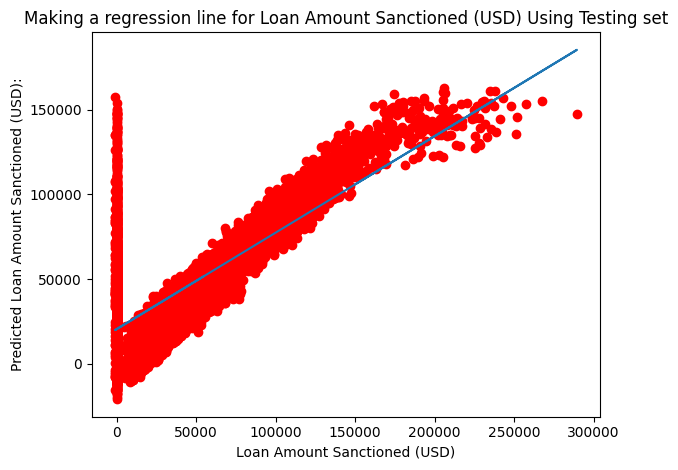

In [ ]:
def slope_intercept(x_val,y_val):
  x=np.array(x_val)
  y=np.array(y_val)
  m=(((np.mean(x)*np.mean(y)) - np.mean(x*y)) / ((np.mean(x)*np.mean(x)) -np.mean(x*x)))
  m=round(m,2)
  b=(np.mean(y) - np.mean(x)*m)
  b=round(b,2)
  #print("Slope :",m,"\tIntercept :",b)
  return m,b


plt.scatter(y_test,y_pre_test)
plt.xlabel("Loan Amount Sanctioned (USD)")
plt.ylabel("Predicted Loan Amount Sanctioned (USD)")
plt.title("Loan Amount Sanctioned (USD) vs Predicted Loan Amount Sanctioned (USD) Using Testing data")
plt.tight_layout()
plt.show()
print()

m,b=slope_intercept(y_test, y_pre_test)
reg_line=[(m*x)+b for x in y_test.values]
plt.scatter(y_test,y_pre_test,color="red")
plt.plot(y_test,reg_line)
plt.xlabel("Loan Amount Sanctioned (USD)")
plt.ylabel("Predicted Loan Amount Sanctioned (USD):")
plt.title("Making a regression line for Loan Amount Sanctioned (USD) Using Testing set")
plt.tight_layout()
plt.savefig('/content/drive/My Drive/Sem5/ml/a2/residual_plot.png')
plt.show()
print()

**Cross Validation Using KFold**

In [ ]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)
model = LinearRegression()

mse_scores = []
mae_scores = []
sse_scores = []
rmse_scores = []
r2_scores = []
adjusted_r2_scores = []


for train_index, test_index in kf.split(x):
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    mse = mean_squared_error(y_test, y_pred)
    sse = np.sum((y_test.values - y_pred)**2)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    adjusted_r2 = 1-((1-r2)*(n-1)/(n-p-1))

    mse_scores.append(mse)
    sse_scores.append(sse)
    mae_scores.append(mae)
    rmse_scores.append(rmse)
    r2_scores.append(r2)
    adjusted_r2_scores.append(adjusted_r2)

df = pd.DataFrame({
    'KFold': list(range(1, 6)),
    'mse_scores': mse_scores,
    'mae_scores': mae_scores,
    'sse_scores': sse_scores,
    'rmse_scores': rmse_scores,
    'r2_scores': r2_scores,
    'adjusted_r2_scores': adjusted_r2_scores
})

mean_row = pd.DataFrame([{
    'KFold': 'Mean',
    'mse_scores': np.mean(mse_scores),
    'mae_scores': np.mean(mae_scores),
    'sse_scores': np.mean(sse_scores),
    'rmse_scores': np.mean(rmse_scores),
    'r2_scores': np.mean(r2_scores),
    'adjusted_r2_scores': np.mean(adjusted_r2_scores)
}])

df = pd.concat([df, mean_row], ignore_index=True)

In [ ]:
df

,KFold,mse_scores,mae_scores,sse_scores,rmse_scores,r2_scores,adjusted_r2_scores
0,1,1.013515e+09,21557.209614,6.012169e+12,31835.745870,0.553473,0.553247
1,2,9.882066e+08,21579.279778,5.862042e+12,31435.753897,0.564420,0.564200
2,3,9.736724e+08,21255.743956,5.775825e+12,31203.724085,0.578268,0.578055
3,4,9.624603e+08,21515.650191,5.709315e+12,31023.544704,0.601733,0.601532
4,5,1.032099e+09,21751.982603,6.122413e+12,32126.301806,0.562980,0.562759
5,Mean,9.939907e+08,21531.973228,5.896353e+12,31525.014072,0.572175,0.571959
